In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places,geo_tools
%matplotlib inline

In [3]:
mesh=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')

In [4]:
bathy=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')

In [6]:
mesh.variables.keys()

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])

In [7]:
bathy.variables.keys()

dict_keys(['nav_lon', 'nav_lat', 'Bathymetry'])

In [16]:
latQU39=50.0307
lonQU39=-125.0992

<ipython-input-17-473eb2e09dcc>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(bathy['nav_lon'],bathy['nav_lat'],bathy['Bathymetry'])


1.1363636363636362

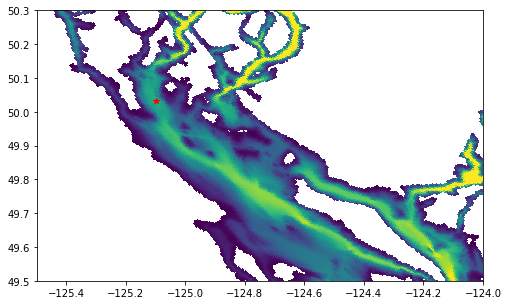

In [17]:
fig,ax=plt.subplots(1,1,figsize=(8,5))
ax.pcolormesh(bathy['nav_lon'],bathy['nav_lat'],bathy['Bathymetry'])
ax.set_xlim(-125.5,-124)
ax.set_ylim(49.5,50.3)
ax.plot(lonQU39,latQU39,'r*')
viz_tools.set_aspect(ax,coords='map')

In [14]:
places.PLACES

{'Campbell River': {'lon lat': (-125.24, 50.04),
  'stn number': 8074,
  'mean sea lvl': 2.916,
  'hist max sea lvl': 5.35,
  'wind grid ji': (190, 102),
  'NEMO grid ji': (747, 125),
  'ww3 grid ji': (453, 109)},
 'Cherry Point': {'lon lat': (-122.766667, 48.866667),
  'stn number': 9449424,
  'mean sea lvl': 3.543,
  'hist max sea lvl': 5.846,
  'wind grid ji': (122, 166),
  'NEMO grid ji': (343, 342),
  'ww3 grid ji': (193, 462)},
 'Friday Harbor': {'lon lat': (-123.016667, 48.55),
  'stn number': 9449880,
  'mean sea lvl': 2.561,
  'hist max sea lvl': 4.572,
  'wind grid ji': (108, 155),
  'NEMO grid ji': (300, 267),
  'ww3 grid ji': (124, 427)},
 'Halfmoon Bay': {'lon lat': (-123.912, 49.511),
  'stn number': 7830,
  'NEMO grid ji': (549, 254),
  'wind grid ji': (158, 136),
  'ww3 grid ji': (331, 297),
  'mean sea lvl': 3.14,
  'hist max sea lvl': 5.61},
 'Nanaimo': {'lon lat': (-123.93, 49.16),
  'stn number': 7917,
  'mean sea lvl': 3.08,
  'hist max sea lvl': 5.47,
  'wind grid

In [21]:
# NEMO grid
j,i=geo_tools.find_closest_model_point(lonQU39,latQU39,mesh.variables['nav_lon'][:,:],mesh.variables['nav_lat'][:,:])
print(j,i)

736 144


In [22]:
# ops grid
ops=nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m08d16.nc')
ops.variables.keys()

dict_keys(['atmpres', 'nav_lat', 'nav_lon', 'precip', 'qair', 'solar', 'tair', 'therm_rad', 'time_counter', 'u_wind', 'v_wind', 'x', 'y'])

In [30]:
jo,io=geo_tools.find_closest_model_point(lonQU39,latQU39,ops.variables['nav_lon'][:,:]-360,ops.variables['nav_lat'][:,:],grid='GEM2.5',)
print(jo,io)

189 106
